In [23]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [24]:
%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


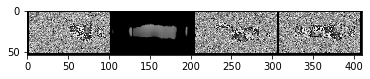

In [25]:
from torch.utils.data import Dataset
from torchvision.utils import make_grid
from PIL import Image
#Probablemente no haga falta normalizar porque ya estan normalizadas
class DatasetPersonalizado(Dataset):
    def __init__(self, main_dir, transform):
        self.main_dir = main_dir
        self.transform = transform
        self.total_imgs = os.listdir(main_dir)

    def __len__(self):
        return len(self.total_imgs)
    
    def __getitem__(self, index):
        img_loc = os.path.join(self.main_dir, self.total_imgs[index])
        image = Image.open(img_loc)
        image = self.transform(image)
        return image

transform = transforms.ToTensor()

dataset = DatasetPersonalizado('./DatasetSoldadurasJuntas/' , transform)
#Numero de imagenes con las que vamos a entrenar
dataset.__len__()

train_set, test_set = torch.utils.data.random_split(dataset, [1300, 202],
        generator=torch.Generator().manual_seed(42))


#Ver como seleccionar las imagenes que vamos a mostrar adecuadamente
img_list = []

for i in range(4):
    img_list.append(train_set.__getitem__(i))

show(make_grid(img_list))

